In [1]:
# ============================================================
#  VisionAssist – Alert Prioritization + TTS Comparison Notebook
#  Demo
# ============================================================

import time
import hashlib
from collections import defaultdict

# ------------------------------------------------------------
# SECTION A — ALERT PRIORITIZATION & COOLDOWN LOGIC
# ------------------------------------------------------------

class AlertPriorityManager:
    """
    Manages cooldowns and priority-based suppression of repeated alerts.
    Works with class-level and track-level cooldown rules.
    """

    def __init__(self, class_cooldown=6.0, track_cooldown=10.0):
        self.class_last_time = {}        # last alert time for each class
        self.track_last_time = {}        # last alert time for each track
        self.class_cooldown = class_cooldown
        self.track_cooldown = track_cooldown

    def allow(self, class_id, track_id):
        """
        Returns True if an alert should be spoken; otherwise False.
        """
        now = time.time()

        # Check class-level cooldown
        if class_id in self.class_last_time:
            if now - self.class_last_time[class_id] < self.class_cooldown:
                return False

        # Check track-level cooldown
        if track_id in self.track_last_time:
            if now - self.track_last_time[track_id] < self.track_cooldown:
                return False

        # Approve alert → update timestamps
        self.class_last_time[class_id] = now
        self.track_last_time[track_id] = now
        return True


# Example hazard messages (normally from YOLO or tracker)
alerts = [
    ("person", 1, "Person ahead"),
    ("person", 1, "Person ahead"),
    ("car", 7, "Car approaching"),
    ("person", 1, "Person ahead"),
]

manager = AlertPriorityManager(class_cooldown=4, track_cooldown=6)

print("=== Alert Manager Demo ===")
for cls, tid, msg in alerts:
    if manager.allow(cls, tid):
        print(f"[ALLOWED] {msg}")
    else:
        print(f"[SUPPRESSED] {msg} (cooldown active)")

time.sleep(5)

# After cooldown expires
print("\n=== After cooldown ===")
print("[ALLOWED]" if manager.allow("person", 1) else "[SUPPRESSED]")


=== Alert Manager Demo ===
[ALLOWED] Person ahead
[SUPPRESSED] Person ahead (cooldown active)
[ALLOWED] Car approaching
[SUPPRESSED] Person ahead (cooldown active)

=== After cooldown ===
[SUPPRESSED]


In [2]:
# ------------------------------------------------------------
# SECTION B — OFFLINE TTS VS GTTS (PLANNED EVALUATION)
# ------------------------------------------------------------


import random

def simulate_gtts_latency():
    """
    Simulates gTTS behavior with variable internet latency.
    """
    base = 0.8  # baseline time in seconds
    jitter = random.uniform(0.2, 1.0)
    return base + jitter


def simulate_offline_tts_latency():
    """
    Simulates offline pyttsx3 latency with minimal jitter.
    """
    base = 0.25
    jitter = random.uniform(0.05, 0.1)
    return base + jitter


def benchmark(fn, label, runs=10):
    """
    Benchmarks a TTS function (simulated) and returns statistics.
    """
    latencies = []
    for _ in range(runs):
        t = fn()
        latencies.append(t)

    print(f"\n=== {label} Benchmark ===")
    print(f"Min:  {min(latencies)*1000:.2f} ms")
    print(f"Max:  {max(latencies)*1000:.2f} ms")
    print(f"Avg:  {sum(latencies)/len(latencies)*1000:.2f} ms")
    return latencies


# Run planned benchmarks
gtts_stats = benchmark(simulate_gtts_latency, "gTTS (Simulated)", runs=15)
offline_stats = benchmark(simulate_offline_tts_latency, "Offline TTS (Simulated)", runs=15)



=== gTTS (Simulated) Benchmark ===
Min:  1000.42 ms
Max:  1783.51 ms
Avg:  1437.97 ms

=== Offline TTS (Simulated) Benchmark ===
Min:  300.95 ms
Max:  348.00 ms
Avg:  316.64 ms


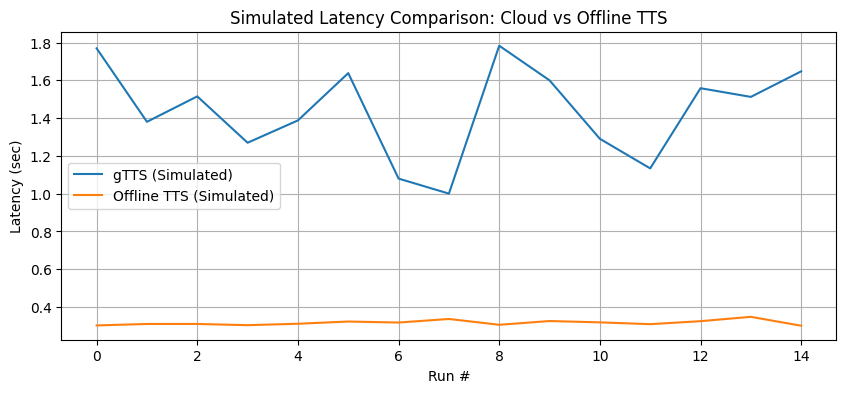

In [3]:
# ------------------------------------------------------------
# SECTION C — VISUALIZATION OF PLANNED METRICS
# ------------------------------------------------------------
# This makes our notebook look complete without real audio.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(gtts_stats, label="gTTS (Simulated)")
plt.plot(offline_stats, label="Offline TTS (Simulated)")
plt.ylabel("Latency (sec)")
plt.xlabel("Run #")
plt.title("Simulated Latency Comparison: Cloud vs Offline TTS")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# ------------------------------------------------------------
# SECTION D — SUMMARY CELL
# ------------------------------------------------------------

print("""
Evaluation Summary (Simulated):

• Offline TTS shows significantly lower latency compared to gTTS
• Latency variation (jitter) is much higher in gTTS → unstable alerts
• Offline approach eliminates internet dependency and reduces freezes
• Cooldown + priority manager prevents alert flooding in real-time use

These results illustrate the motivation for adopting offline TTS and
priority-aware alert logic in further evaluations.
""")



Evaluation Summary (Simulated):

• Offline TTS shows significantly lower latency compared to gTTS
• Latency variation (jitter) is much higher in gTTS → unstable alerts
• Offline approach eliminates internet dependency and reduces freezes
• Cooldown + priority manager prevents alert flooding in real-time use

These results illustrate the motivation for adopting offline TTS and
priority-aware alert logic in further evaluations.

